# **Convolutional Neural Networks Project: Street View Housing Number Digit Recognition**

# **Marks: 30**

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

To build a CNN model that can recognize the digits in the images.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [1]:
LOCAL = True

if LOCAL:
    path='.'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    path='/content/drive/MyDrive'

## **Importing the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk # only used for versioning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '' ## use CPU because my GPU is weak but my will is strong
# os.environ["CUDA_VISIBLE_DEVICES"] = '-1' # back to GPU... Nope, not enough GPU memory ;-(

import tensorflow as tf
import tensorflow.keras as keras # only used for versioning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import gc # garbage collection
import sys # only used for versioning
 
from tensorflow.python.client import device_lib 

2023-03-09 07:45:52.185188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Let us check the version of tensorflow.**

In [3]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")
print()
print('System Info:')
print(device_lib.list_local_devices())

Tensor Flow Version: 2.10.0
Keras Version: 2.10.0
Python 3.10.4 | packaged by conda-forge | (main, Mar 24 2022, 17:38:57) [GCC 10.3.0]
Pandas 1.5.3
Scikit-Learn 1.2.1
GPU is NOT AVAILABLE

System Info:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 861465633913683967
xla_global_id: -1
]


2023-03-09 07:45:54.097465: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-09 07:45:54.097526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: hellway
2023-03-09 07:45:54.097548: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: hellway
2023-03-09 07:45:54.097695: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-03-09 07:45:54.097829: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-03-09 07:45:54.097842: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-03-09 07:45:54.099030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File(f'{path}/SVHN_single_grey1.h5', 'r')

# Load the the train and the test dataset
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and the testing dataset.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

### **Question 1: Complete the below code to visualize the first 10 images in the dataset. (1 Mark)**

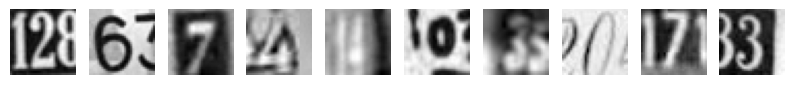

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualizing the first 10 images in the dataset and printing their labels
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)    
    plt.imshow(X_train[i], cmap = "gray")  # Write the function to visualize images
    plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [7]:
# Shape and the array of pixels for the first image
print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

In [9]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
# New shape 
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **Question 2: One-hot encode the labels in the target variable y_train and y_test. (2 Marks)**

In [11]:
# Write the function and appropriate variable name to one-hot encode the output
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
- Notice that each entry of the target variable is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.

In [12]:
# Fix the seed for random number generators
np.random.seed(42)

import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Question 3: Build and train a CNN model as per the above mentioned architecture. (10 Marks)**

In [13]:
def cnn_model_1():
    
    # Define the model
    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence
    
    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), input_shape = (32, 32, 1), padding = 'same'))
    model.add(LeakyReLU(0.1))
    
    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))
    model.add(Flatten())

    # Fully Connected Block
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    
    # Classifier
    model.add(Dense(10, activation = 'softmax')) # 10 classes for numberals 0-9

    # Optimizer
    adam = Adam(learning_rate = 0.001)
   
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [14]:
# Build the model
model_1 = cnn_model_1()

In [15]:
# Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

#### Fit the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20. Store the model building history to use later for visualization.

In [16]:
# Fit the model

# Splitting the dataset into the Training and Validation set.
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train,
    test_size = 0.2, random_state = 42, stratify = y_train)

# Fit to be tied, now we fit furiously without out GPU, Grrr...
history_model_1 = model_1.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split), batch_size = 32, verbose = 1, epochs=20)

Epoch 1/20
1050/1050 [==============================] - 36s 34ms/step - loss: 1.1286 - accuracy: 0.6266 - val_loss: 0.6166 - val_accuracy: 0.8221
Epoch 2/20
1050/1050 [==============================] - 36s 34ms/step - loss: 0.5372 - accuracy: 0.8446 - val_loss: 0.5260 - val_accuracy: 0.8449
Epoch 3/20
1050/1050 [==============================] - 36s 34ms/step - loss: 0.4472 - accuracy: 0.8706 - val_loss: 0.4937 - val_accuracy: 0.8570
Epoch 4/20
1050/1050 [==============================] - 36s 34ms/step - loss: 0.3882 - accuracy: 0.8866 - val_loss: 0.4753 - val_accuracy: 0.8608
Epoch 5/20
1050/1050 [==============================] - 36s 34ms/step - loss: 0.3393 - accuracy: 0.9002 - val_loss: 0.4694 - val_accuracy: 0.8649
Epoch 6/20
1050/1050 [==============================] - 36s 34ms/step - loss: 0.2998 - accuracy: 0.9107 - val_loss: 0.4555 - val_accuracy: 0.8726
Epoch 7/20
1050/1050 [==============================] - 36s 34ms/step - loss: 0.2675 - accuracy: 0.9195 - val_loss: 0.4685 -

### **Plotting the validation and training accuracies**

### **Question 4: Write your observations on the below plot. (2 Marks)**

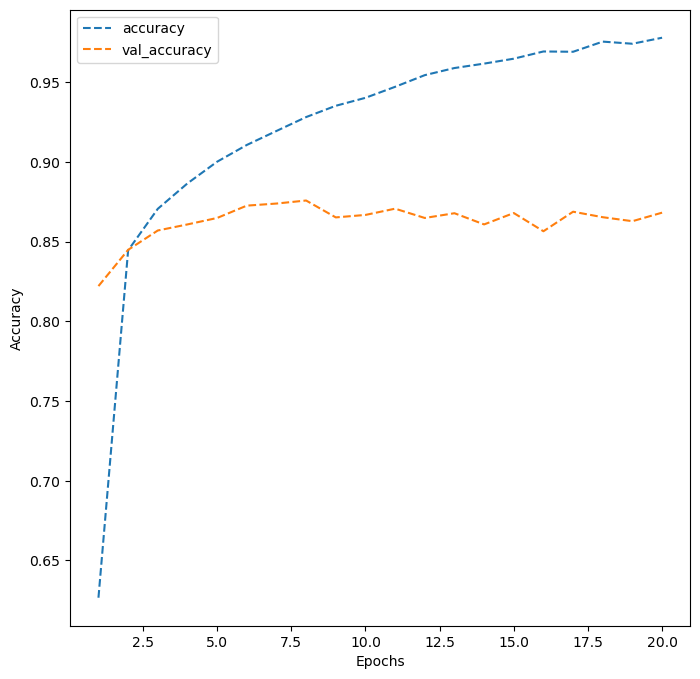

263/263 - 3s - loss: 0.8200 - accuracy: 0.8682 - 3s/epoch - 11ms/step
[0.8199825286865234, 0.8682143092155457]


In [18]:
# Plotting the accuracies
dict_hist = history_model_1.history
list_ep = [i for i in range(1, 21)]
plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Printing results

# Don't do this! 
#accuracy_1 = model_1.evaluate(X_test, y_test, verbose = 2) #  We don't want to peek into the test set yet.

# We can do this.
accuracy_1 = model_1.evaluate(X_val_split, y_val_split, verbose = 2)
print(accuracy_1)

**Observations:**
I'm sort of doing this backwards by doing the CNN before the ANN, but I'm channeling François Chollet.

Unfortunately we couldn't untilize our GPU due to low amount memory present on the card, so we are using a 4-core Xeon CPU.

Running this CNN model on the CPU took 34ms/step which is significantly better than the same model run on Colab.  

Our validation accurary is nearly 87% which seems pretty good as a initial benchmark.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [19]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Do garbage collection
gc.collect()

9531

In [20]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Question 5: Build and train the second CNN model as per the above mentioned architecture. (10 Marks)**

In [21]:
def cnn_model_2():
    # Define the model
    model = Sequential() 
    
    # Add layers as per the architecture mentioned above in the same sequence
    
    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), input_shape = (32, 32, 1), padding = 'same'))
    model.add(LeakyReLU(0.1))
    
    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization()) #Add a BatchNormalization layer
    
    
    # Third Convolutional Block
    model.add(Conv2D(32, (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    
    # Fourth Convolutional Block
    model.add(Conv2D(64, (3, 3), padding = 'same'))
    model.add(LeakyReLU(0.1))    
    model.add(MaxPooling2D(2, 2))
    model.add(BatchNormalization())
    model.add(Flatten())

    # Fully Connected Block
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))
    
    # Classifier
    model.add(Dense(10, activation = 'softmax')) # 10 classes for numberals 0-9

    # Optimizer
    adam = Adam(learning_rate = 0.001)
   
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [22]:
# Build the model
model_2 = cnn_model_2()

In [23]:
# Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [24]:
# Fit the model

# We've already split the data so let's not repeat this...
# Splitting the dataset into the Training and Validation set. 
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify = y_train)

# Fit to be tied, now we fit furiously without out GPU, Grrr...
history_model_2 = model_2.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split), batch_size = 128, verbose = 1, epochs=30)

Epoch 1/30
263/263 [==============================] - 67s 253ms/step - loss: 1.3695 - accuracy: 0.5330 - val_loss: 1.7947 - val_accuracy: 0.3886
Epoch 2/30
263/263 [==============================] - 66s 252ms/step - loss: 0.6827 - accuracy: 0.7901 - val_loss: 0.6703 - val_accuracy: 0.8079
Epoch 3/30
263/263 [==============================] - 66s 252ms/step - loss: 0.5549 - accuracy: 0.8303 - val_loss: 0.5128 - val_accuracy: 0.8454
Epoch 4/30
263/263 [==============================] - 66s 253ms/step - loss: 0.4877 - accuracy: 0.8521 - val_loss: 0.4429 - val_accuracy: 0.8735
Epoch 5/30
263/263 [==============================] - 66s 252ms/step - loss: 0.4425 - accuracy: 0.8656 - val_loss: 0.4244 - val_accuracy: 0.8789
Epoch 6/30
263/263 [==============================] - 66s 252ms/step - loss: 0.3979 - accuracy: 0.8776 - val_loss: 0.4029 - val_accuracy: 0.8910
Epoch 7/30
263/263 [==============================] - 66s 253ms/step - loss: 0.3748 - accuracy: 0.8816 - val_loss: 0.3792 - val_ac

### **Plotting the validation and training accuracies**

### **Question 6: Write your observations on the below plot. (2 Marks)**

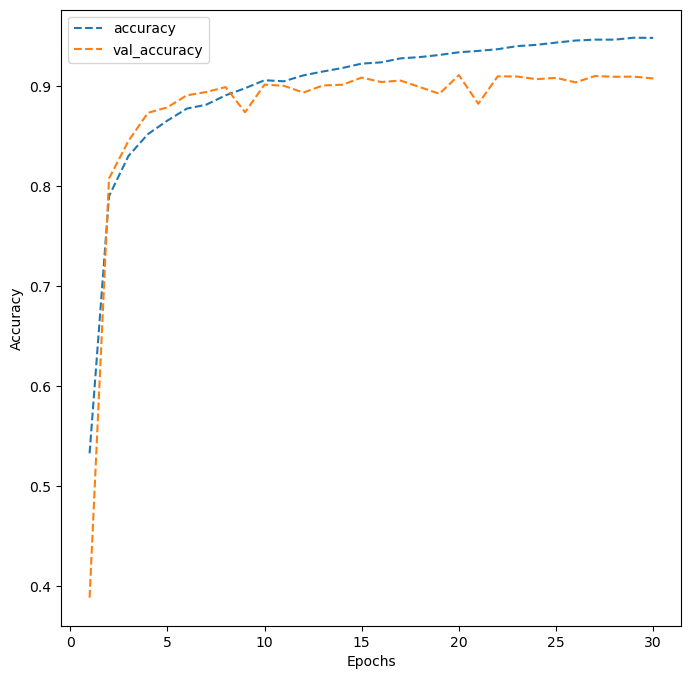

263/263 - 5s - loss: 0.4928 - accuracy: 0.9079 - 5s/epoch - 20ms/step
[0.4928285479545593, 0.9078571200370789]


In [25]:
# Plotting the accuracies
dict_hist = history_model_2.history
list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

#Printing results
accuracy_2 = model_2.evaluate(X_val_split, y_val_split, verbose = 2)
print(accuracy_2)

**Observations:**
Our training accuracy is up from 87% to almost 92%.  The batch normalization and dropout layer has signifcantly improved the model. 

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Question 7: Make predictions on the test data using the second model. (1 Mark)** 

In [26]:
# Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)
test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 11s 20ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [27]:
# Converting each entry to single label from one-hot encoded vector
y_test_hot = np.argmax(y_test, axis = -1) # We want to preserve y_test for code validation.

In [28]:
test_pred.shape, y_test_hot.shape

((18000,), (18000,))

### **Question 8: Write your final observations on the performance of the model on the test data. (2 Marks)**

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1814
           1       0.89      0.92      0.91      1828
           2       0.93      0.92      0.92      1803
           3       0.86      0.87      0.87      1719
           4       0.91      0.93      0.92      1812
           5       0.86      0.93      0.90      1768
           6       0.91      0.88      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.92      0.89      0.90      1812
           9       0.92      0.89      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



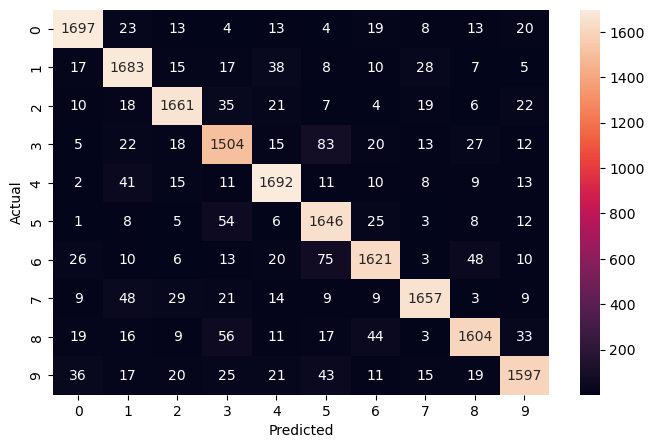

In [29]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_hot, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test_hot, test_pred)

plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**

Oh boy! This model took some computing power. The cooling fans sounded like a jet engine at take-off!!!
```
Core 0:       +83.0°C  (high = +80.0°C, crit = +100.0°C)
Core 1:       +84.0°C  (high = +80.0°C, crit = +100.0°C)
Core 2:       +80.0°C  (high = +80.0°C, crit = +100.0°C)
Core 3:       +81.0°C  (high = +80.0°C, crit = +100.0°C)

"Aye, the haggis is in the fire for sure." --Scotty
```

At 253ms/step we are are starting see the limitation of our hardware and touch on real-world scaling issues with large datasets and features numbers.

Honestly I'm suprise the model works this well!  The precision, recall and f1-score values where 92% which seems unreasonablity good considering the image quality of the visualized samples.  The next step might be to analyze the misclassified images and see if we gleen some understanding into how to improve the model.

We cannot claim ourselves the Conqueror of Time and Death, as of yet.

# Summary and Conclusions

# Appendix

# Resources